In [1]:
import pandas as pd
titanic = pd.read_csv('/Users/seuli/Downloads/titanic.csv')

## ++ [ Q1 ] : Titanic Data 에서 각 변수별 NA를 포함정도를 %로 구하고 이를 막대그래프로 표현 하시오

In [106]:
# 누락값이 아닌 개수 
print(titanic.count())

Unnamed: 0     1309
PassengerId    1309
Survived        891
Pclass         1309
Name           1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Ticket         1309
Fare           1308
Cabin           295
Embarked       1307
dtype: int64


In [107]:
# 누락값 개수 구하기
num_rows = titanic.shape[0]
num_missing = num_rows - titanic.count()
print(num_missing)

Unnamed: 0        0
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [108]:
# 퍼센트로 나타내기 
num_percent = (num_missing/titanic.shape[0]*100)
print(num_percent)

Unnamed: 0      0.000000
PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64


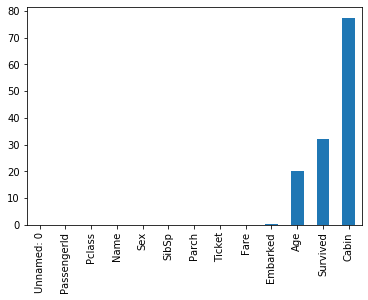

In [111]:
# 그래프 그리기
import seaborn as sns
import matplotlib.pyplot as plt

num_percent.sort_values().plot(kind='bar')


## ++ [ Q2 ] : Titanic Data에서 NA값을 제외하고 성별에 따른 생존자들의 수를 시각화 하여 포현 하시오.

In [94]:
# 데이터 na값 제외시키기

titanic_2 = titanic.groupby(['Sex','Survived'])['Sex'].count()
titanic_dropna = titanic_2.dropna()
print(titanic_2)


Sex     Survived
female  0.0          81
        1.0         233
male    0.0         468
        1.0         109
Name: Sex, dtype: int64


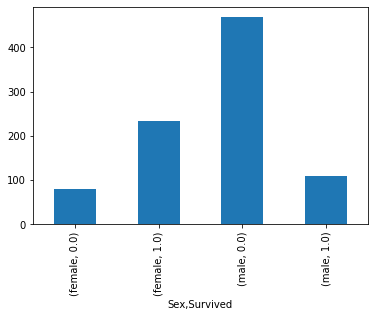

In [113]:
# 그래프 그리기


titanic_dropna.plot(kind='bar')


## ++ [ Q3 ] : Titanic Data에서 NA값을 제외하고 "Pclass"에 따른 생존자들의 수를 시각화 하여 표현 하시오.

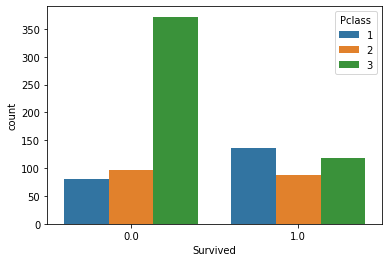

In [123]:
titanic_4 = titanic[titanic['Pclass'].isna()==False]

sns.countplot(x='Survived', hue='Pclass', data=titanic_4)

## ++ [ Q4 ] : Titanic Data에서 NA값을 제외하고 각각의 "Pclass" 에 대한 탑승객 수를 시각화하고, Pclass에 따른 생존자들의 수를 함께 표현 하시오

In [148]:
titanic_nonena = titanic[titanic['Pclass'].isna()==False]

Text(0.5, 1.0, 'Pclass : Survived vs Dead')

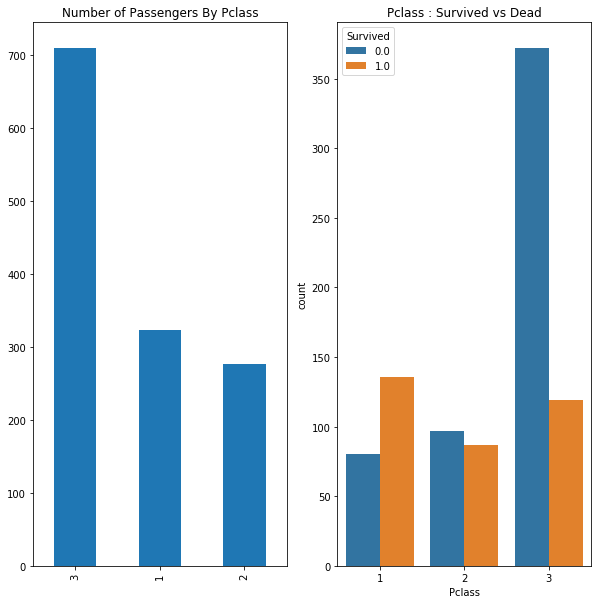

In [171]:
f, ax = plt.subplots(1, 2, figsize=(10, 10))
titanic_nonena["Pclass"].value_counts().plot.bar(ax=ax[0])
sns.countplot(x='Pclass', hue='Survived', data=titanic_nonena, ax=ax[1])
ax[0].set_title("Number of Passengers By Pclass")
ax[1].set_title("Pclass : Survived vs Dead")

## ++ [ Q5 ] : Titanic Data에서 NA값을 제외하고 각각의 "Pclass" 에 대한 연령별 생존자수를 시각화하고(boxplot or violinplot), 성별에 따른 생존자들의 수를 함께 표현 하시오

In [172]:
titanic_nonena = titanic[titanic['Pclass'].isna()==False]

Text(0.5, 1.0, 'Sex and Age vs Survived')

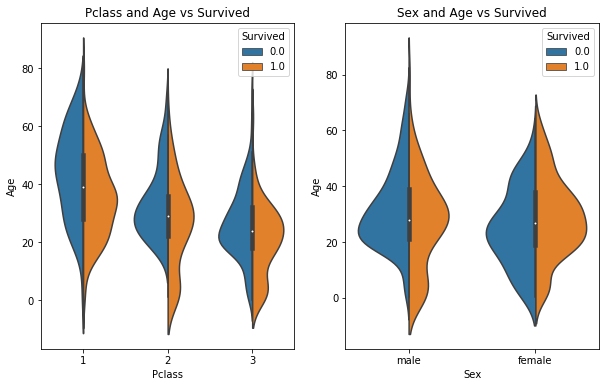

In [176]:
f, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=titanic_nonena, split=True, ax=ax[0])
sns.violinplot(x="Sex", y="Age", hue="Survived", data=titanic_nonena, split=True, ax=ax[1])
ax[0].set_title("Pclass and Age vs Survived")
ax[1].set_title("Sex and Age vs Survived")